# Machine Learning

### (The project's data comes from Kaggle. <Train.csv> is used for ml training and <test.csv> is used for testing model.)
--- 
## **Description**: </br> </br> Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. 
## **Goal**: </br> </br>With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [83]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # remove all warnings from the output
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth',-1)

In [84]:
# use sklearn library KNN method
from sklearn.impute import KNNImputer

In [85]:
# KNN used to fill null value
def null_KNNfill (df, n):
    dfnull_list=df.values.tolist()
    
    imputer = KNNImputer(n_neighbors=n)
    knnlist_fill = imputer.fit_transform(dfnull_list)
    df_frame=pd.DataFrame(knnlist_fill)
    return df_frame

In [86]:
# use the first unique value to fill null if the null percentage is not higher than 20% 
def unique_fill (df,column):
    uni_value = df[column].unique()[0]
    df[column].fillna(uni_value,inplace=True)
    return df[column].isnull().sum()

In [87]:
# read house price data file
df_house=pd.read_csv('train.csv')

In [88]:
# get general info about data
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [89]:
#pick out feature having bull value
null_feature = [i for i in df_house.columns if df_house[i].isnull().sum() !=0]
null_feature

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Look at each feature with null

In [90]:
#calculate null percentage
def null(df, feature, plot=False):
    t = df[feature].isna().mean() * 100
    print(f'% of null: {t}%')
    if plot:
        sns.countplot(df[feature], palette='Set3')

### LotFontage (Linear feet of street connected to property)

In [91]:
null(df_house,'LotFrontage')

% of null: 17.73972602739726%


In [8]:
#use mean value to fill null in lotFontage
df_house['LotFrontage'].fillna(df_house['LotFrontage'].mean(), inplace=True)
df_house['LotFrontage'].isnull().sum()

0

### Alley (Type of alley access to property)

In [93]:
# df_house['Alley'].value_counts()

% of null: 93.76712328767123%


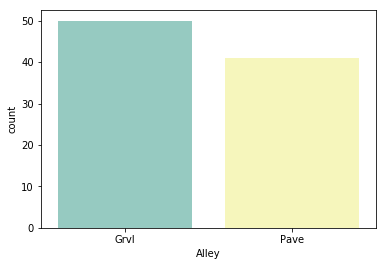

In [94]:
null(df_house,'Alley',True)

In [11]:
#  as its null percent is high, drop it (more than 90%)
df_house.drop('Alley', axis=1, inplace = True)

### MasVnrType (Masonry veneer type)

In [95]:
# df_house['MasVnrType'].value_counts()

% of null: 0.547945205479452%


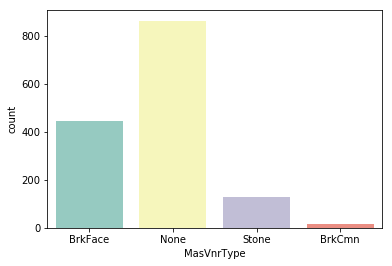

In [96]:
null(df_house,'MasVnrType',True)

In [97]:
unique_fill(df_house,'MasVnrType')

0

### MasVnrArea (Masonry veneer area in square feet)

In [98]:
null(df_house,'MasVnrArea')

% of null: 0.547945205479452%


In [99]:
df_house['MasVnrArea'].fillna(df_house['MasVnrArea'].mean(), inplace=True)

### BsmtQual (Evaluates the height of the basement)

% of null: 2.5342465753424657%


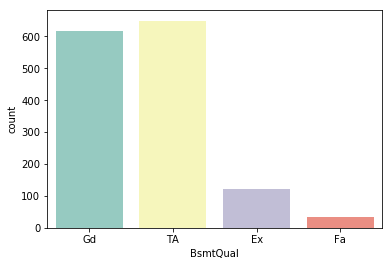

In [100]:
null(df_house,'BsmtQual',True)

In [101]:
unique_fill(df_house,'BsmtQual')

0

### BsmtCond (Evaluates the general condition of the basement)

% of null: 2.5342465753424657%


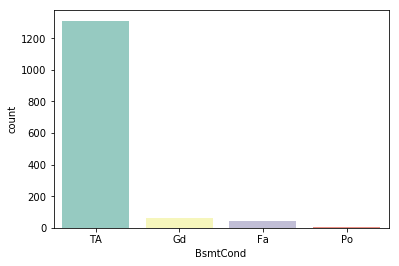

In [102]:
null(df_house,'BsmtCond',True)

In [103]:
unique_fill(df_house,'BsmtCond')

0

### BsmtExposure (Refers to walkout or garden level walls)

% of null: 2.6027397260273974%


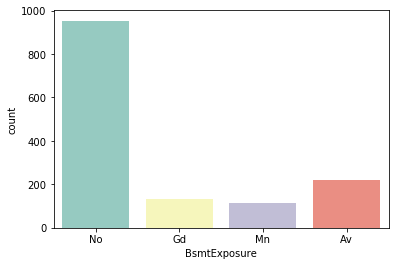

In [104]:
null(df_house,'BsmtExposure',True)

In [105]:
unique_fill(df_house,'BsmtExposure')

0

### BsmtFinType1 (Rating of basement finished area)

% of null: 2.5342465753424657%


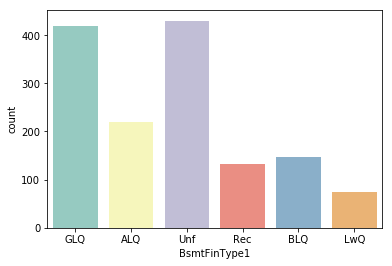

In [106]:
null(df_house,'BsmtFinType1',True)

In [107]:
unique_fill(df_house,'BsmtFinType1')

0

### BsmtFinType2 (Rating of basement finished area (if multiple types))

% of null: 2.6027397260273974%


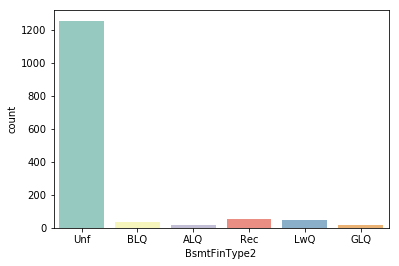

In [108]:
null(df_house,'BsmtFinType2',True)

In [109]:
unique_fill(df_house,'BsmtFinType2')

0

### Electrical (Electrical system)

% of null: 0.0684931506849315%


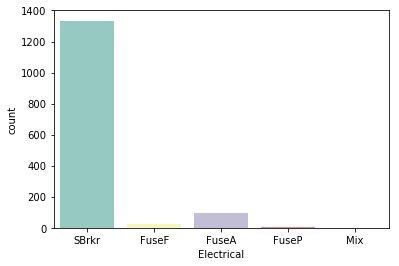

In [27]:
null(df_house,'Electrical',True)

In [110]:
unique_fill(df_house,'Electrical')

0

### FireplaceQu (Fireplace quality)

% of null: 47.26027397260274%


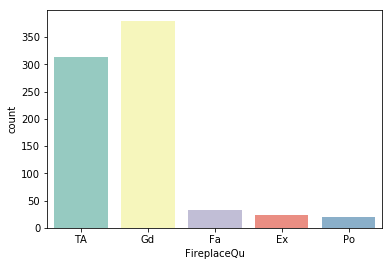

In [111]:
null(df_house,'FireplaceQu',True)

In [112]:
df_house['FireplaceQu'].fillna('None',inplace=True)#around 50% isnull,so only can use none to fill.

### GarageType (Garage location)

% of null: 5.5479452054794525%


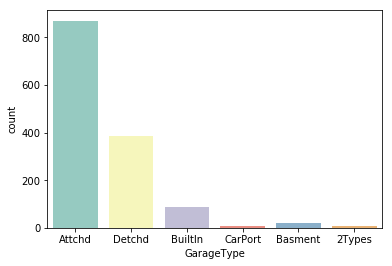

In [113]:
null(df_house,'GarageType',True)

In [115]:
unique_fill(df_house,'GarageType')

0

### GarageYrBlt (Year garage was built)

In [116]:
null(df_house,'GarageYrBlt')

% of null: 5.5479452054794525%


In [117]:
mode_garyr=df_house['GarageYrBlt'].mode()

In [118]:
# use mode value to fill null value
df_house['GarageYrBlt'].fillna(mode_garyr,inplace=True)

In [119]:
# null_KNNfill(df_house[['MSSubClass','LotArea','YearBuilt','YearRemodAdd','GarageYrBlt']],4)

### GarageFinish (Interior finish of the garage)

% of null: 5.5479452054794525%


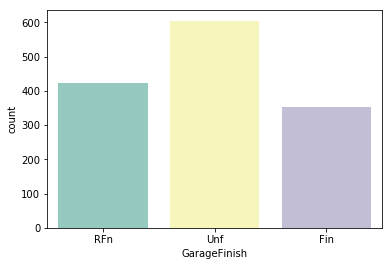

In [120]:
null(df_house,'GarageFinish',True)

In [121]:
unique_fill(df_house,'GarageFinish')

0

### GarageQual (Garage quality)

% of null: 5.5479452054794525%


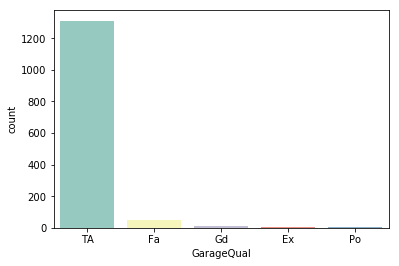

In [122]:
null(df_house,'GarageQual',True)

In [123]:
unique_fill(df_house,'GarageQual')

0

### GarageCond (Garage condition)

% of null: 5.5479452054794525%


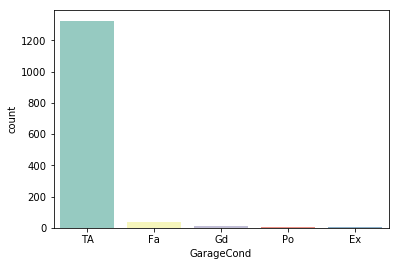

In [124]:
null(df_house,'GarageCond',True)

In [125]:
unique_fill(df_house,'GarageCond')

0

### PoolQC (Pool quality)

% of null: 99.52054794520548%


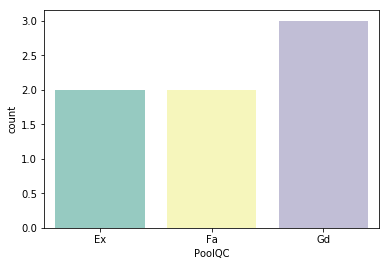

In [126]:
null(df_house,'PoolQC',True)

In [127]:
# as null percentage is quite high, drop it
df_house.drop('PoolQC', axis=1, inplace= True)

### Fence (Fence quality)

% of null: 80.75342465753424%


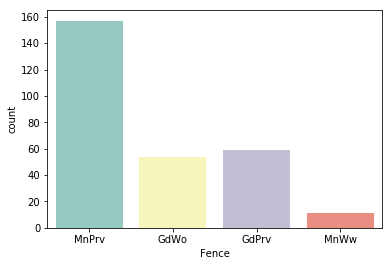

In [129]:
null(df_house,'Fence',True)

In [130]:
# null percentage is lower than 90%, but still high, fill with None
df_house['Fence'].fillna('None', inplace=True)

### MiscFeature (Miscellaneous feature not covered in other categories)

% of null: 96.30136986301369%


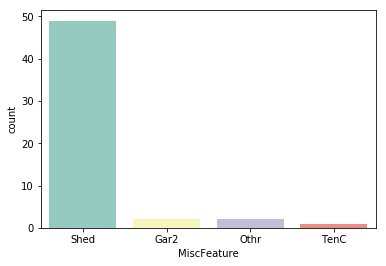

In [131]:
null(df_house,'MiscFeature',True)

In [132]:
# as null percentage is quite high, drop it
df_house.drop('MiscFeature', axis=1, inplace= True)

### Encoding

In [133]:
#set y and x value
y_house=df_house['SalePrice']
x_house=df_house.drop('SalePrice',axis=1)

# one label encoding before data split
from sklearn.preprocessing import LabelEncoder

x_house=x_house.apply(LabelEncoder().fit_transform)
x_house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,5,3,36,327,1,2,3,3,0,...,0,0,0,0,4,0,1,2,8,4
1,1,0,3,51,498,1,2,3,3,0,...,0,0,0,0,4,0,4,1,8,4
2,2,5,3,39,702,1,2,0,3,0,...,0,0,0,0,4,0,8,2,8,4
3,3,6,3,31,489,1,2,0,3,0,...,108,0,0,0,4,0,1,0,8,0
4,4,5,3,55,925,1,2,0,3,0,...,0,0,0,0,4,0,11,2,8,4
5,5,4,3,56,915,1,2,0,3,0,...,0,17,0,0,2,10,9,3,8,4
6,6,0,3,46,552,1,2,3,3,0,...,0,0,0,0,4,0,7,1,8,4
7,7,5,3,110,593,1,2,0,3,0,...,94,0,0,0,4,2,10,3,8,4
8,8,4,4,22,138,1,2,3,3,0,...,83,0,0,0,4,0,3,2,8,0
9,9,14,3,21,222,1,2,3,3,0,...,0,0,0,0,4,0,0,2,8,4


In [135]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x_house,y_house,test_size=0.3,random_state=0)

In [144]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred=cross_val_score(model,x_house,y_house,cv=5,scoring='r2')
    return pred

def print_evaluate (true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square=metrics.r2_score(true,predicted)
    print('MAE:',mae)
    print('MSE:',mse)
    print('RMSE:',rmse)
    print('R Square:',r2_square)

def evaluate (true,predicted):
    mae=metrics.mean_absolute_error(true,predicted)
    mse=metrics.mean_squared_error(true,predicted)
    rmse=np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square=metrics.r2_score(true,predicted)
    return mae, mse, rmse, r2_square  


In [146]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [147]:
print(lin_reg.intercept_)#y=ax+b里面b的值

70549.50397992341


In [148]:
coeff=pd.DataFrame(lin_reg.coef_,x_house.columns,columns=['Coefficient'])#a的值 ，a也是weight
coeff.sort_values('Coefficient') # coefficient lower, more relevant 

,Coefficient
Condition2,-38188.942056
Utilities,-37829.842060
KitchenAbvGr,-25749.055417
ExterQual,-9931.376773
BsmtQual,-9711.772462
KitchenQual,-6362.422581
BedroomAbvGr,-4276.736729
BldgType,-2843.462862
Condition1,-2227.338844
HouseStyle,-2140.274578


In [149]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

print('train set evaluation:\n_____________')
print_evaluate(y_train,train_pred)
print('===============')
print('test set evaluation:\n_____________')
print_evaluate(y_test,test_pred)

train set evaluation:
_____________
MAE: 18352.37322229349
MSE: 770989114.5493224
RMSE: 27766.69073817264
R Square: 0.873603290343195
test set evaluation:
_____________
MAE: 22727.473833983488
MSE: 1510079390.7685497
RMSE: 38859.73997299196
R Square: 0.7775694071939598


In [150]:
evaluate_df = pd.DataFrame(data=[["Linear Regression",*evaluate(y_test,test_pred),cross_val(LinearRegression())]],
                      columns=['Model','MAE','MSE','RMSE','R Square','Cross Validation'])#We can use this function to see the rating of the model.

In [151]:
evaluate_df

,Model,MAE,MSE,RMSE,R Square,Cross Validation
0,Linear Regression,22727.473834,1.510079e+09,38859.739973,0.777569,"[0.8717851241597693, 0.8225975429464161, 0.8301010469624195, 0.8501069728466596, 0.75125387664029]"


## ?????

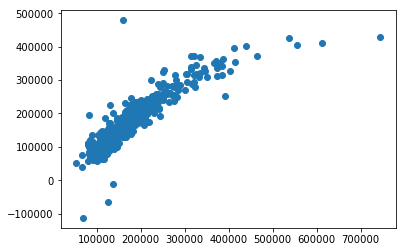

In [152]:
plt.scatter(y_test,test_pred)

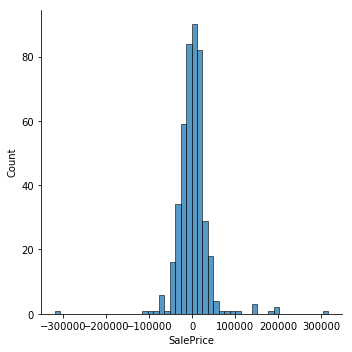

In [154]:
sns.displot((y_test-test_pred),bins=50)

### standardization scalling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipline import Pipeline

# x_train_stand = x_train.copy()
# x_test_stand = x_test.copy()



In [ ]:
from sklearn.preprocessing import PolynomialFeatures